In [91]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

class SafeLoaderIgnoreUnknown(yaml.SafeLoader):
    def ignore_unknown(self, node):
        return None 

SafeLoaderIgnoreUnknown.add_constructor(None, SafeLoaderIgnoreUnknown.ignore_unknown)

def read_pbt_hparams(config_path):
    # parse yaml
    with open(config_path) as file:
        config = yaml.load(file, Loader=SafeLoaderIgnoreUnknown)

    pbt_keys = ['lr_init', 'dropout_rate', 'l2_gen_scale', 'l2_con_scale']
    pbt_values = {key:config[key] for key in pbt_keys}

    # read config as txt, search for cd_rate (workaround for python object load)
    with open(config_path, 'r') as file:
        config_txt = file.read()
        # search for cd_rate
        cd_rate = config_txt.split('cd_rate: ')[1].split('\n')[0]
        pbt_values['cd_rate'] = cd_rate

    return pbt_values


name_translation = {
    'chewie_09_15': 'Chewie_CO_FF_2016-09-15',
    'chewie_09_21': 'Chewie_CO_FF_2016-09-21',
    'chewie_10_05': 'Chewie_CO_FF_2016-10-05',
    'chewie_10_07': 'Chewie_CO_FF_2016-10-07',
    'mihili_02_03': 'Mihili_CO_FF_2014-02-03',
    'mihili_02_17': 'Mihili_CO_FF_2014-02-17',
    'mihili_02_18': 'Mihili_CO_FF_2014-02-18',
    'mihili_03_07': 'Mihili_CO_FF_2014-03-07',
}

In [92]:
results_folder = '/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/'
model_name = 'kl1_gauss'
bs=256

fac_dim=100

try:
    del(LLs)
    del(R2s)
    del(pbt_df)
except NameError:
    pass

for dataset in name_translation.keys():
    for model in ['lfads','band']:
        for area in ['both','M1','PMd']:
            # load LLs
            # join path with band_both_8f_kl1_gauss_bs256
            if area == 'both':
                dataset_name = dataset
            else:
                dataset_name = f'{dataset}_{area}'
            path = os.path.join(results_folder, dataset_name, f'{model}_{area}_{fac_dim}f_{model_name}_bs{bs}','LL_diff.csv')
            print(path)
            # if file exists -- read
            if os.path.exists(path):
                # import csv
                df = pd.read_csv(path)
                # add name column
                df['dataset'] = dataset
                df['model'] = model
                df['area'] = area
                # remove the first column
                df = df.drop(columns=['Unnamed: 0'])
                # join with the previous
                try:
                    LLs = pd.concat([LLs, df])
                except NameError:
                    LLs = df

            # load R2s
            path = os.path.join(results_folder, dataset_name, f'{model}_{area}_{fac_dim}f_{model_name}_bs{bs}','R2_results.csv')
            # if file exists -- read
            if os.path.exists(path):
                # import csv
                df = pd.read_csv(path)
                # add name column
                df['dataset'] = dataset
                df['model'] = model
                df['area'] = area
                # remove the first column
                df = df.drop(columns=['Unnamed: 0'])
                # join with the previous
                try:
                    R2s = pd.concat([R2s, df])
                except NameError:
                    R2s = df

            # read yaml:
            config_path = os.path.join(results_folder, dataset_name, f'{model}_{area}_{fac_dim}f_{model_name}_bs{bs}',
                           'best_model','hparams.yaml')
            pbt_values = read_pbt_hparams(config_path)
            # convert to df
            df = pd.DataFrame(pbt_values, index=[0])
            # add name column
            df['dataset'] = dataset
            df['model'] = model
            df['area'] = area
            # join with the previous
            try:
                pbt_df = pd.concat([pbt_df, df])
            except NameError:
                pbt_df = df



LLs

/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15/lfads_both_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_M1/lfads_M1_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_PMd/lfads_PMd_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15/band_both_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_M1/band_M1_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_15_PMd/band_PMd_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_21/lfads_both_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_21_M1/lfads_M1_100f_kl1_gauss_bs256/LL_diff.csv
/disk/scratch2/nkudryas/BAND-torch/runs/pbt-band-paper/chewie_09_21_PMd/lfads_PMd_100f_kl1_gauss_b

,LL,LL_noci,LL_AD,LL_noci_AD,dataset,model,area
0,0.286996,0.205886,0.096752,0.066847,chewie_09_15,lfads,both
0,0.408792,0.149818,0.135474,0.073073,chewie_09_15,lfads,M1
0,0.240038,0.202211,0.076562,0.063033,chewie_09_15,lfads,PMd
0,0.265879,0.214266,0.085831,0.063422,chewie_09_15,band,both
0,0.363206,0.175986,0.117898,0.019033,chewie_09_15,band,M1
0,0.237210,0.187886,0.076082,0.060623,chewie_09_15,band,PMd
0,0.248500,0.209728,0.071518,0.061836,chewie_09_21,lfads,both
0,0.260633,0.103651,0.075773,0.026222,chewie_09_21,lfads,M1
0,0.235642,0.210860,0.067213,0.061932,chewie_09_21,lfads,PMd
0,0.247225,0.155986,0.071035,0.048812,chewie_09_21,band,both


In [93]:
pbt_df

,lr_init,dropout_rate,l2_gen_scale,l2_con_scale,cd_rate,dataset,model,area
0,0.004,0.085222,0.000978,0.000862,0.5,chewie_09_15,lfads,both
0,0.004,0.218881,0.100428,0.021394,0.5,chewie_09_15,lfads,M1
0,0.004,0.475223,0.288298,0.012592,0.5,chewie_09_15,lfads,PMd
0,0.004,0.016504,0.050961,0.014533,0.5,chewie_09_15,band,both
0,0.004,0.032432,0.000440,0.566359,0.5,chewie_09_15,band,M1
0,0.004,0.271358,0.048974,0.003146,0.5,chewie_09_15,band,PMd
0,0.004,0.097775,0.010024,0.008556,0.5,chewie_09_21,lfads,both
0,0.004,0.285854,0.176715,0.666535,0.5,chewie_09_21,lfads,M1
0,0.004,0.441649,0.519626,0.948254,0.5,chewie_09_21,lfads,PMd
0,0.004,0.371957,0.015478,0.000626,0.5,chewie_09_21,band,both


In [94]:
R2s

,seq2seq from factors,seq2seq from factors no CI,seq2seq from factprs in AD,seq2seq from factors no CI in AD,band behavior,band behavior no CI,band behavior in AD,band behavior no CI in AD,seq2seq from controls,dataset,model,area
0,85.144929,74.150557,81.618274,68.964420,-2.504552,-2.670374,-3.516787,-3.675815,9.597019,chewie_09_15,lfads,both
0,82.155953,61.788430,78.097813,56.873317,-3.571452,-3.629127,-4.586394,-4.561373,15.791669,chewie_09_15,lfads,M1
0,84.682794,72.230185,81.010734,65.985663,-1.935104,-1.865067,-2.617311,-2.521259,18.618342,chewie_09_15,lfads,PMd
0,90.884530,77.524276,88.552073,69.040577,91.374266,79.774090,89.331690,71.069718,30.862626,chewie_09_15,band,both
0,90.091762,71.903101,88.157148,59.225323,91.335686,71.418967,89.550745,57.874814,46.055856,chewie_09_15,band,M1
0,87.524810,74.685849,84.171268,67.074852,88.212314,75.958705,84.874573,68.823410,40.294872,chewie_09_15,band,PMd
0,87.610934,69.663307,84.136755,63.559021,-2.209813,-2.313003,-3.695704,-3.633682,23.614325,chewie_09_21,lfads,both
0,83.772624,-4489.558429,83.133144,-5089.298072,-2.471711,-2.306917,-3.181909,-3.077965,31.044942,chewie_09_21,lfads,M1
0,81.858624,65.349934,77.480641,60.975495,-2.275379,-2.331052,-3.021699,-2.975509,24.548101,chewie_09_21,lfads,PMd
0,87.506939,63.572840,83.853120,54.813511,87.658491,67.109524,84.695273,60.748244,29.393676,chewie_09_21,band,both


# Visualize

IndexError: index 0 is out of bounds for axis 0 with size 0

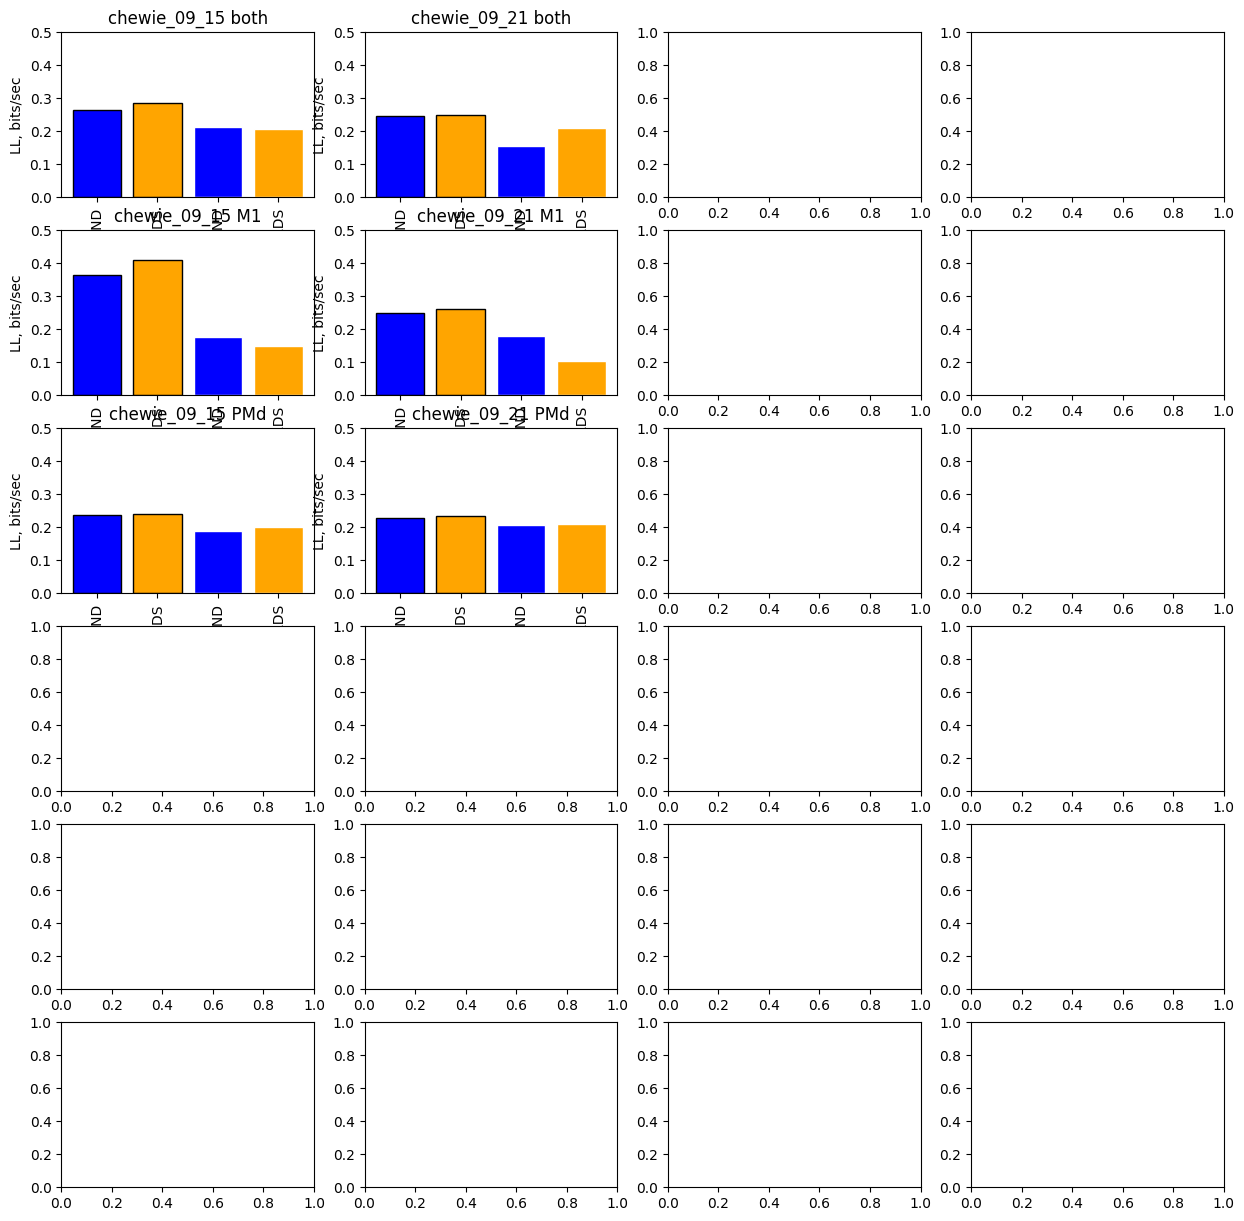

In [96]:
def LLs_barplot(dataset, area, axes):
    # filter by dataset
    df = LLs[(LLs['dataset'] == dataset) & (LLs['area'] == area)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        LL_BAND = df[df['model'] == 'band']['LL'].values[0]
        LL_LFADS = df[df['model'] == 'lfads']['LL'].values[0]
        LL_noci_BAND = df[df['model'] == 'band']['LL_noci'].values[0]
        LL_noci_LFADS = df[df['model'] == 'lfads']['LL_noci'].values[0]
        # plot
        axes.bar(['BAND', 'LFADS', 'noci_BAND', 'noci_LFADS'], [LL_BAND, LL_LFADS, LL_noci_BAND, LL_noci_LFADS],
                 color=['blue', 'orange', 'blue', 'orange'],
                 edgecolor=['black','black','white','white'],
                 linewidth=1)
    axes.set_ylabel('LL, bits/sec')
    axes.set_ylim([0,0.5])
    axes.tick_params(axis='x', rotation=90)
    axes.set_title(dataset+' '+area)
    # remove legend

fig, axes = plt.subplots(2*3, 4, figsize=(15, 15))
for i, dataset in enumerate(name_translation.keys()):
    for j, area in enumerate(['both','M1','PMd']):
        LLs_barplot(dataset, area,axes[(i//4)*3+j, i%4])

plt.tight_layout()

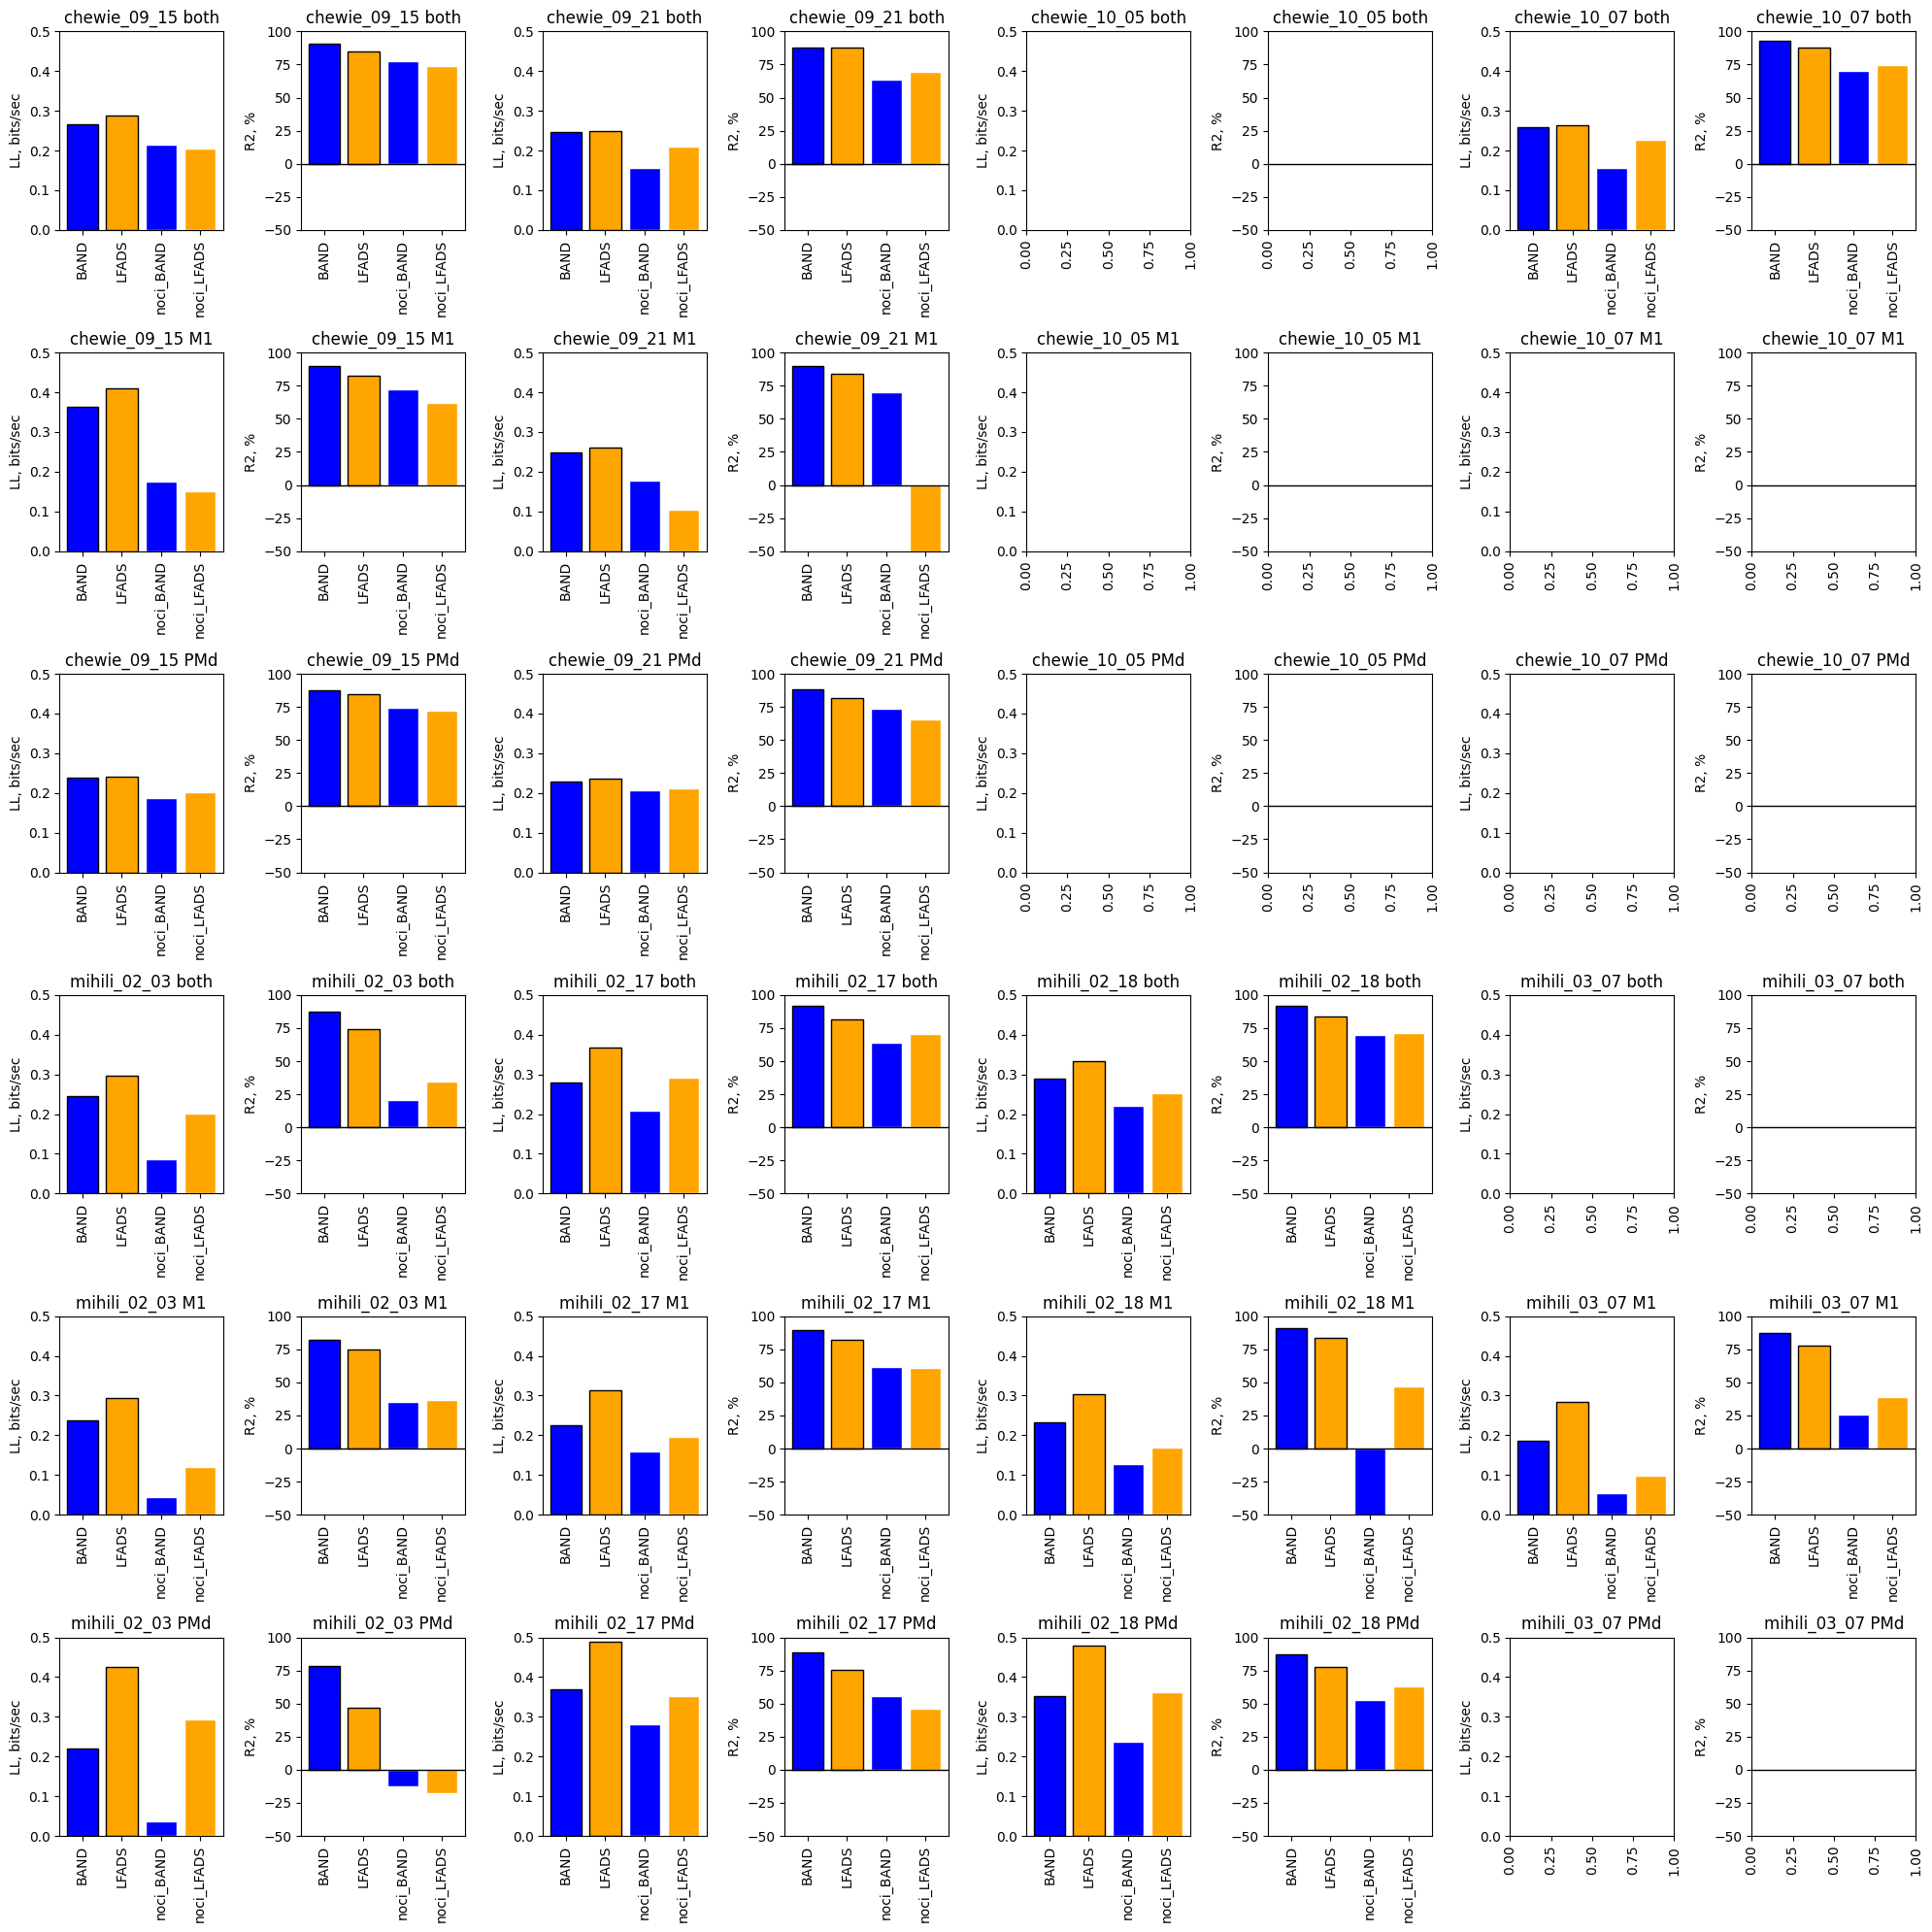

In [ ]:
def R2s_barplot(dataset, area, axes):
    # filter by dataset
    df = R2s[(R2s['dataset'] == dataset) & (R2s['area'] == area)]
    # groupby area, plot LL for lfads vs band
    # if any data
    if df.shape[0] > 0:
        # get LL for band, LL for lfads, LL_noci for band and LL_noci for lfads
        R2_BAND = df[df['model'] == 'band']['seq2seq from factors'].values[0]
        R2_LFADS = df[df['model'] == 'lfads']['seq2seq from factors'].values[0]
        R2_BAND_noci = df[df['model'] == 'band']['seq2seq from factors no CI'].values[0]
        R2_LFADS_noci = df[df['model'] == 'lfads']['seq2seq from factors no CI'].values[0]
        # plot
        axes.bar(['BAND', 'LFADS', 'noci_BAND', 'noci_LFADS'], [R2_BAND, R2_LFADS, R2_BAND_noci, R2_LFADS_noci],
                 color=['blue', 'orange', 'blue', 'orange'],
                 edgecolor=['black','black','white','white'],
                 linewidth=1)
    axes.set_ylabel('R2, %')
    axes.set_ylim([-50,100])
    axes.tick_params(axis='x', rotation=90)
    axes.axhline(0, color='black', linewidth=1)
    axes.set_title(dataset+' '+area)
    # remove legend

fig, axes = plt.subplots(2*3, 4*2, figsize=(20, 20))
for i, dataset in enumerate(name_translation.keys()):
    for j, area in enumerate(['both','M1','PMd']):
        LLs_barplot(dataset, area,axes[(i//4)*3+j, (i%4)*2 + 0])
        R2s_barplot(dataset, area,axes[(i//4)*3+j, (i%4)*2 + 1])

plt.tight_layout()

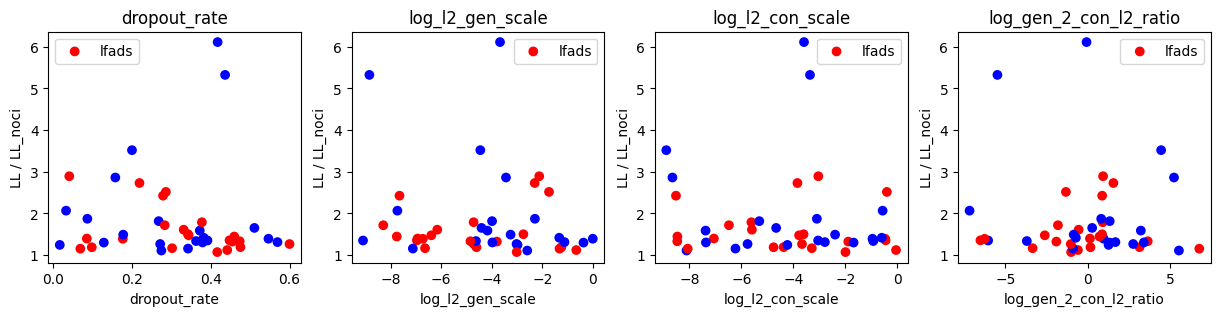

In [115]:
# plot ll ratio to ll_noci vs pbt_params
LLs['LL_ratio'] = LLs['LL'] / LLs['LL_noci']
# join with pbt_df
LLs_pbt = LLs.merge(pbt_df, on=['dataset','model','area'])
LLs_pbt['log_gen_2_con_l2_ratio'] = np.log(LLs_pbt['l2_gen_scale'] / LLs_pbt['l2_con_scale'])
LLs_pbt['log_l2_gen_scale'] = np.log(LLs_pbt['l2_gen_scale'])  
LLs_pbt['log_l2_con_scale'] = np.log(LLs_pbt['l2_con_scale'])
# plot
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
for i, param in enumerate(['dropout_rate', 'log_l2_gen_scale', 'log_l2_con_scale', 'log_gen_2_con_l2_ratio']):
    # colorcode lfads vs band
    axes[i].scatter(LLs_pbt[param], LLs_pbt['LL_ratio'], c=LLs_pbt['model'].map({'lfads':'red', 'band':'blue'}))
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('LL / LL_noci')
    axes[i].set_title(param)
    axes[i].legend(['lfads','band'])

In [100]:
LLs_pbt

,LL,LL_noci,LL_AD,LL_noci_AD,dataset,model,area,LL_ratio,lr_init,dropout_rate,l2_gen_scale,l2_con_scale,cd_rate
0,0.286996,0.205886,0.096752,0.066847,chewie_09_15,lfads,both,1.393954,0.004,0.085222,0.000978,0.000862,0.5
1,0.408792,0.149818,0.135474,0.073073,chewie_09_15,lfads,M1,2.728600,0.004,0.218881,0.100428,0.021394,0.5
2,0.240038,0.202211,0.076562,0.063033,chewie_09_15,lfads,PMd,1.187068,0.004,0.475223,0.288298,0.012592,0.5
3,0.265879,0.214266,0.085831,0.063422,chewie_09_15,band,both,1.240883,0.004,0.016504,0.050961,0.014533,0.5
4,0.363206,0.175986,0.117898,0.019033,chewie_09_15,band,M1,2.063834,0.004,0.032432,0.000440,0.566359,0.5
5,0.237210,0.187886,0.076082,0.060623,chewie_09_15,band,PMd,1.262525,0.004,0.271358,0.048974,0.003146,0.5
6,0.248500,0.209728,0.071518,0.061836,chewie_09_21,lfads,both,1.184867,0.004,0.097775,0.010024,0.008556,0.5
7,0.260633,0.103651,0.075773,0.026222,chewie_09_21,lfads,M1,2.514514,0.004,0.285854,0.176715,0.666535,0.5
8,0.235642,0.210860,0.067213,0.061932,chewie_09_21,lfads,PMd,1.117531,0.004,0.441649,0.519626,0.948254,0.5
9,0.247225,0.155986,0.071035,0.048812,chewie_09_21,band,both,1.584925,0.004,0.371957,0.015478,0.000626,0.5
